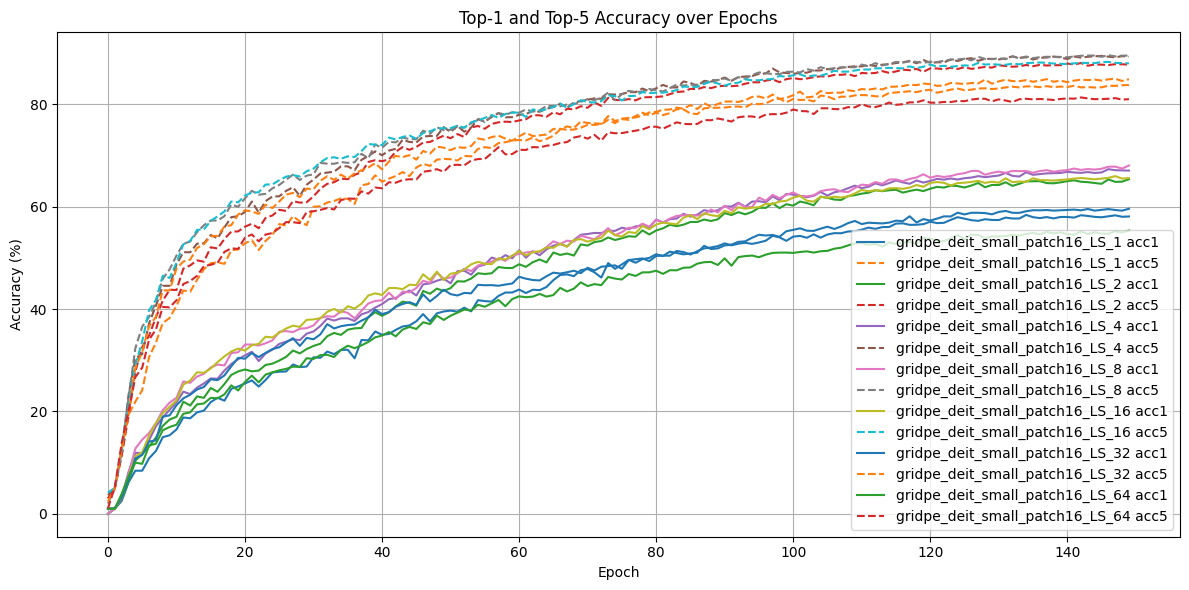

In [1]:
import os
import json
import matplotlib.pyplot as plt

# Base directory where model logs are stored
base_path = "./eval_results_abligation"

# List of model names to be evaluated
models = [
    "gridpe_deit_small_patch16_LS_1",
    "gridpe_deit_small_patch16_LS_2",
    "gridpe_deit_small_patch16_LS_4",
    "gridpe_deit_small_patch16_LS_8",
    "gridpe_deit_small_patch16_LS_16",
    "gridpe_deit_small_patch16_LS_32",
    "gridpe_deit_small_patch16_LS_64",
]

# Dictionary to store accuracy results
results = {}

# Parse log.txt for each model to extract Top-1 and Top-5 accuracy per epoch
for model in models:
    log_path = os.path.join(base_path, model, 'pretrain',"log.txt")
    acc1_list = []
    acc5_list = []

    with open(log_path, "r") as f:
        for line in f:
            if line.strip():
                entry = json.loads(line)
                acc1_list.append(entry.get("test_acc1", 0))
                acc5_list.append(entry.get("test_acc5", 0))

    results[model] = {
        "acc1": acc1_list,
        "acc5": acc5_list
    }

# Plotting the results
plt.figure(figsize=(12, 6))

# Draw Top-1 and Top-5 accuracy curves for each model
for model, data in results.items():
    epochs = list(range(len(data["acc1"])))
    plt.plot(epochs, data["acc1"], label=f"{model} acc1")
    plt.plot(epochs, data["acc5"], label=f"{model} acc5", linestyle="--")

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Top-1 and Top-5 Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

| Model | Input Size | Top-1 Accuracy (%) | Top-5 Accuracy (%) |
|-------|------------|--------------------|--------------------|
| gridpe_deit_small_patch16_LS_1 | 160 | 49.04 | 77.14 |
| gridpe_deit_small_patch16_LS_1 | 192 | 55.58 | 81.32 |
| gridpe_deit_small_patch16_LS_1 | 224 | 58.92 | 83.68 |
| gridpe_deit_small_patch16_LS_1 | 256 | 59.88 | 84.42 |
| gridpe_deit_small_patch16_LS_1 | 320 | 58.7 | 83.78 |
| gridpe_deit_small_patch16_LS_1 | 384 | 56.28 | 83.0 |
| gridpe_deit_small_patch16_LS_1 | 448 | 52.9 | 81.18 |
| gridpe_deit_small_patch16_LS_1 | 512 | 50.58 | 78.92 |
| gridpe_deit_small_patch16_LS_2 | 160 | 51.56 | 79.1 |
| gridpe_deit_small_patch16_LS_2 | 192 | 59.64 | 84.22 |
| gridpe_deit_small_patch16_LS_2 | 224 | 63.54 | 87.08 |
| gridpe_deit_small_patch16_LS_2 | 256 | 64.9 | 87.94 |
| gridpe_deit_small_patch16_LS_2 | 320 | 63.12 | 87.34 |
| gridpe_deit_small_patch16_LS_2 | 384 | 60.8 | 85.5 |
| gridpe_deit_small_patch16_LS_2 | 448 | 58.72 | 84.26 |
| gridpe_deit_small_pa

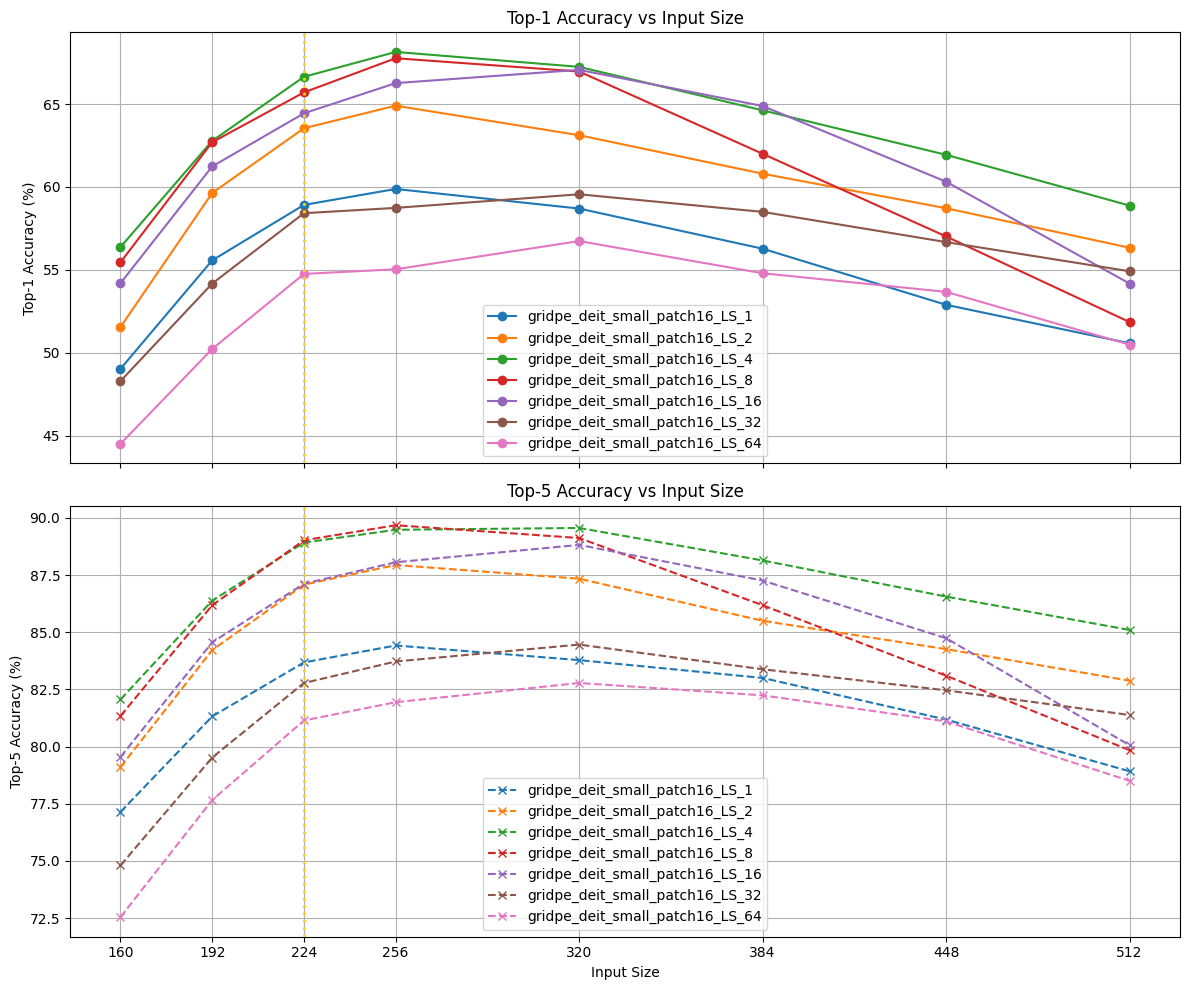

In [2]:
import os
import matplotlib.pyplot as plt

# Base directory where model logs are stored
base_path = "./eval_results_abligation"

# List of model names to be evaluated
models = [
    "gridpe_deit_small_patch16_LS_1",
    "gridpe_deit_small_patch16_LS_2",
    "gridpe_deit_small_patch16_LS_4",
    "gridpe_deit_small_patch16_LS_8",
    "gridpe_deit_small_patch16_LS_16",
    "gridpe_deit_small_patch16_LS_32",
    "gridpe_deit_small_patch16_LS_64",
]

# List of input sizes used during evaluation
input_sizes = [160, 192, 224, 256, 320, 384, 448, 512]

# Dictionary to store results for each model
results = {model: {"acc1": {}, "acc5": {}} for model in models}

# Read evaluation results from txt files
for model in models:
    for size in input_sizes:
        txt_path = os.path.join(base_path, model, "evaluation", str(size), "eval_results.txt")
        if os.path.exists(txt_path):
            with open(txt_path, "r") as f:
                lines = f.readlines()
                acc1 = None
                acc5 = None
                for line in lines:
                    if "acc1" in line:
                        acc1 = float(line.split("acc1:")[1].strip())
                    if "acc5" in line:
                        acc5 = float(line.split("acc5:")[1].strip())
                results[model]["acc1"][size] = acc1
                results[model]["acc5"][size] = acc5
        else:
            results[model]["acc1"][size] = None
            results[model]["acc5"][size] = None

# --- Generate Markdown Table ---
markdown_table = "| Model | Input Size | Top-1 Accuracy (%) | Top-5 Accuracy (%) |\n"
markdown_table += "|-------|------------|--------------------|--------------------|\n"

for model in models:
    for size in input_sizes:
        acc1 = results[model]["acc1"].get(size, "N/A")
        acc5 = results[model]["acc5"].get(size, "N/A")
        markdown_table += f"| {model} | {size} | {acc1} | {acc5} |\n"

# Print the Markdown table
print(markdown_table)

# --- Plotting Subplots ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top-1 subplot
for model in models:
    acc1_values = [results[model]["acc1"].get(size) for size in input_sizes]
    ax1.plot(input_sizes, acc1_values, marker='o', label=model)

ax1.axvline(x=224, color='gold', linestyle=':', linewidth=2)
ax1.set_title("Top-1 Accuracy vs Input Size")
ax1.set_ylabel("Top-1 Accuracy (%)")
ax1.grid(True)
ax1.legend()

# Top-5 subplot
for model in models:
    acc5_values = [results[model]["acc5"].get(size) for size in input_sizes]
    ax2.plot(input_sizes, acc5_values, marker='x', linestyle='--', label=model)

ax2.axvline(x=224, color='gold', linestyle=':', linewidth=2)
ax2.set_title("Top-5 Accuracy vs Input Size")
ax2.set_xlabel("Input Size")
ax2.set_ylabel("Top-5 Accuracy (%)")
ax2.set_xticks(input_sizes)
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

| Model | Input Size | Top-1 Accuracy (%) | Top-5 Accuracy (%) |
|-------|------------|--------------------|--------------------|
| gridpe_deit_small_patch16_LS_1_no_rotation | 160 | 49.06 | 77.14 |
| gridpe_deit_small_patch16_LS_1_no_rotation | 192 | 55.58 | 81.32 |
| gridpe_deit_small_patch16_LS_1_no_rotation | 224 | 58.92 | 83.66 |
| gridpe_deit_small_patch16_LS_1_no_rotation | 256 | 59.92 | 84.46 |
| gridpe_deit_small_patch16_LS_1_no_rotation | 320 | 58.7 | 83.78 |
| gridpe_deit_small_patch16_LS_1_no_rotation | 384 | 56.3 | 82.96 |
| gridpe_deit_small_patch16_LS_1_no_rotation | 448 | 52.9 | 81.18 |
| gridpe_deit_small_patch16_LS_1_no_rotation | 512 | 50.58 | 78.92 |
| gridpe_deit_small_patch16_LS_2_no_rotation | 160 | 51.48 | 79.08 |
| gridpe_deit_small_patch16_LS_2_no_rotation | 192 | 59.64 | 84.22 |
| gridpe_deit_small_patch16_LS_2_no_rotation | 224 | 63.52 | 87.04 |
| gridpe_deit_small_patch16_LS_2_no_rotation | 256 | 64.88 | 87.92 |
| gridpe_deit_small_patch16_LS_2_no_rotation 

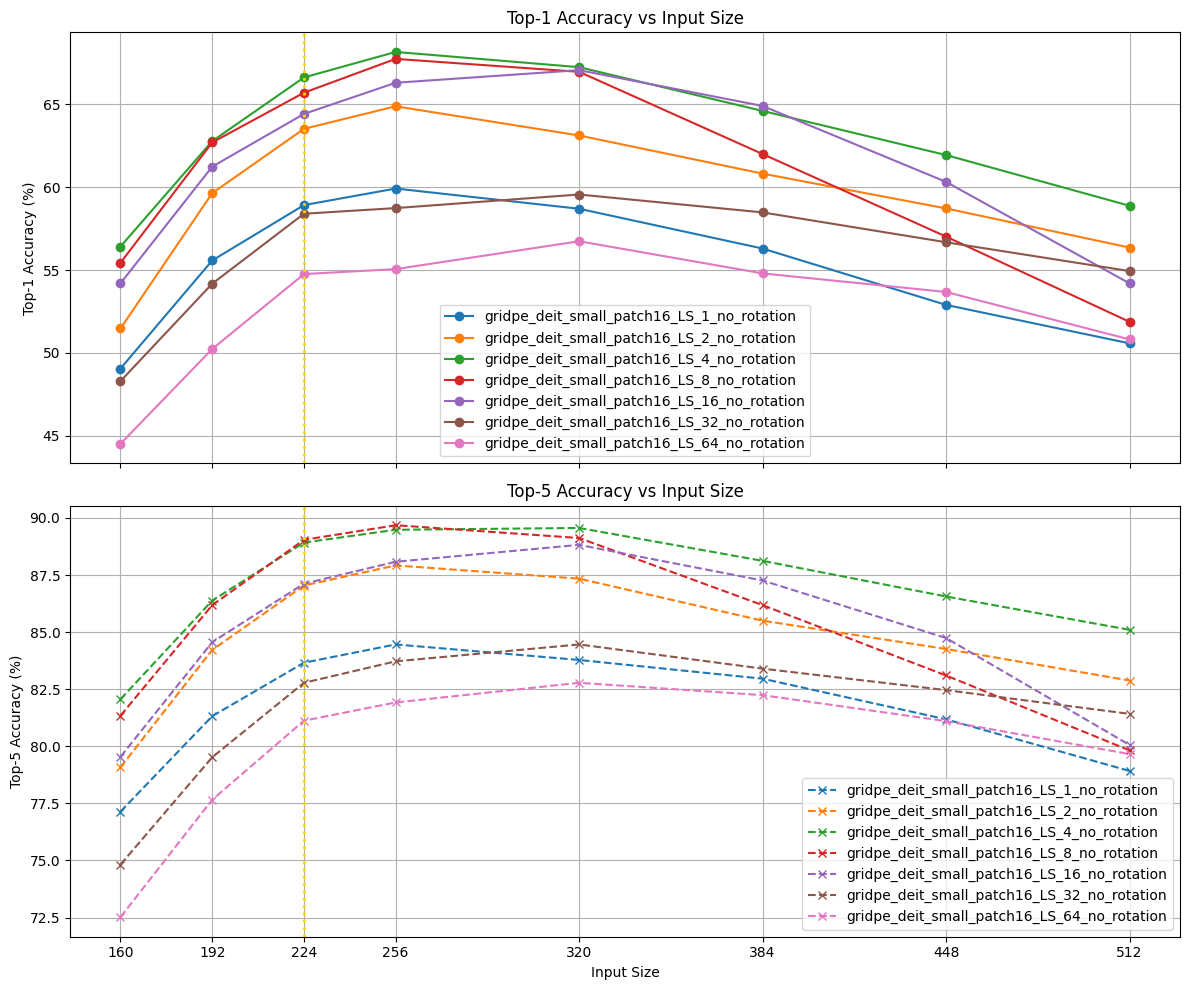

In [3]:
import os
import matplotlib.pyplot as plt

# Base directory where model logs are stored
base_path = "./eval_results_abligation"

# List of model names to be evaluated
models = [
    "gridpe_deit_small_patch16_LS_1_no_rotation",
    "gridpe_deit_small_patch16_LS_2_no_rotation",
    "gridpe_deit_small_patch16_LS_4_no_rotation",
    "gridpe_deit_small_patch16_LS_8_no_rotation",
    "gridpe_deit_small_patch16_LS_16_no_rotation",
    "gridpe_deit_small_patch16_LS_32_no_rotation",
    "gridpe_deit_small_patch16_LS_64_no_rotation",
]

# List of input sizes used during evaluation
input_sizes = [160, 192, 224, 256, 320, 384, 448, 512]

# Dictionary to store results for each model
results = {model: {"acc1": {}, "acc5": {}} for model in models}

# Read evaluation results from txt files
for model in models:
    for size in input_sizes:
        txt_path = os.path.join(base_path, model, "evaluation", str(size), "eval_results.txt")
        if os.path.exists(txt_path):
            with open(txt_path, "r") as f:
                lines = f.readlines()
                acc1 = None
                acc5 = None
                for line in lines:
                    if "acc1" in line:
                        acc1 = float(line.split("acc1:")[1].strip())
                    if "acc5" in line:
                        acc5 = float(line.split("acc5:")[1].strip())
                results[model]["acc1"][size] = acc1
                results[model]["acc5"][size] = acc5
        else:
            results[model]["acc1"][size] = None
            results[model]["acc5"][size] = None

# --- Generate Markdown Table ---
markdown_table = "| Model | Input Size | Top-1 Accuracy (%) | Top-5 Accuracy (%) |\n"
markdown_table += "|-------|------------|--------------------|--------------------|\n"

for model in models:
    for size in input_sizes:
        acc1 = results[model]["acc1"].get(size, "N/A")
        acc5 = results[model]["acc5"].get(size, "N/A")
        markdown_table += f"| {model} | {size} | {acc1} | {acc5} |\n"

# Print the Markdown table
print(markdown_table)

# --- Plotting Subplots ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top-1 subplot
for model in models:
    acc1_values = [results[model]["acc1"].get(size) for size in input_sizes]
    ax1.plot(input_sizes, acc1_values, marker='o', label=model)

ax1.axvline(x=224, color='gold', linestyle=':', linewidth=2)
ax1.set_title("Top-1 Accuracy vs Input Size")
ax1.set_ylabel("Top-1 Accuracy (%)")
ax1.grid(True)
ax1.legend()

# Top-5 subplot
for model in models:
    acc5_values = [results[model]["acc5"].get(size) for size in input_sizes]
    ax2.plot(input_sizes, acc5_values, marker='x', linestyle='--', label=model)

ax2.axvline(x=224, color='gold', linestyle=':', linewidth=2)
ax2.set_title("Top-5 Accuracy vs Input Size")
ax2.set_xlabel("Input Size")
ax2.set_ylabel("Top-5 Accuracy (%)")
ax2.set_xticks(input_sizes)
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()